In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001181001"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001181001
SIC,6021
Description,NATIONAL COMMERCIAL BANKS
Name,ALLIANCE BANKSHARES CORP
Ticker,ABVA


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,10.0,8.189000e+00,1.589503e+00,6.51,6.6,8.12,9.755,10.06
interest income,33.0,6.986485e+06,2.033073e+06,3403000.00,5773000.0,7038000.00,8320000.000,10537000.00
net income,33.0,-2.236364e+04,1.442712e+06,-4252000.00,-493000.0,394000.00,1111000.000,1400000.00
net interest income,33.0,3.960788e+06,9.623439e+05,2215000.00,3210000.0,4110000.00,4733000.000,5546000.00
provision for loan losses,33.0,5.999394e+05,8.576929e+05,85000.00,255000.0,344000.00,580000.000,4704000.00


# Plots

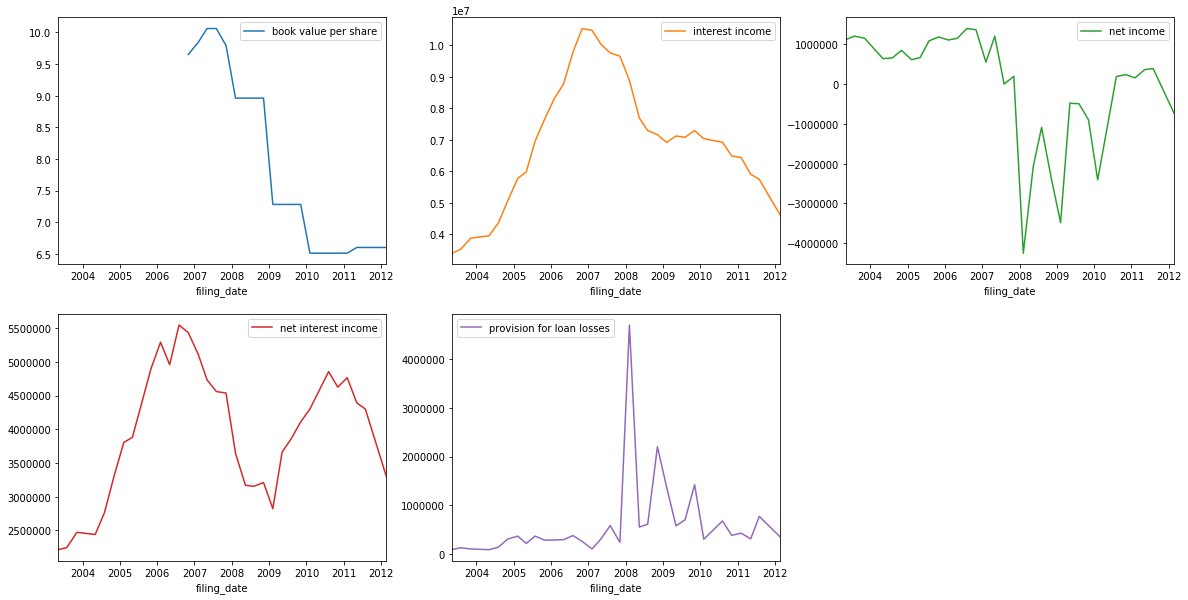

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0001181001 book value per share       2003Q1 to 2006Q2: 14 periods  missing   
           book value per share                             2007Q2  missing   
           book value per share        2008Q1 to 2008Q3: 3 periods  missing   
           book value per share        2009Q1 to 2009Q3: 3 periods  missing   
           book value per share        2010Q1 to 2010Q4: 4 periods  missing   
           book value per share                             2011Q3  missing   
           interest income                                  2003Q4  missing   
           interest income                                  2010Q1  missing   
           interest income                                  2011Q3  missing   
           net income                                       2003Q4  missing   
           net income                                       2010Q1  missing   
           net income                                       2011Q3  missing   
           net interest income                              2003Q4  missing   
           net interest income                              2010Q1  missing   
           net interest income                              2011Q3  missing   
           provision for loan losses                        2003Q4  missing   
           provision for loan losses                        2010Q1  missing   
           provision for loan losses                        2011Q3  missing   
           total revenue                                      None    empty   

                                                 message  
cik        item                                           
0001181001 book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()